In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import cv2

In [2]:
csvf = pd.read_csv('chinese_mnist.csv')

In [3]:
csvf.head()

,suite_id,sample_id,code,value,character
0,1,1,10,9,九
1,1,10,10,9,九
2,1,2,10,9,九
3,1,3,10,9,九
4,1,4,10,9,九


In [4]:
filename = csvf[['suite_id', 'sample_id', 'code']].values

images = [ cv2.imread(f"data/data/input_{suite_id}_{sample_id}_{code}.jpg") for suite_id, sample_id, code in filename ]
labels = [ [x - 1] for x in csvf['code'].values ]



In [5]:
from sklearn.model_selection import train_test_split
images = np.array(images)
labels = np.array(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels)

In [6]:
# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(64,64,3)),
#     keras.layers.Dense(100),
#     keras.layers.Dense(15,activation='sigmoid'),
# ])

# model.compile(
#     optimizer='adam',
#     loss= 'sparse_categorical_crossentropy',
#     metrics= ['accuracy']
# )

# model.fit(train_images,train_labels,epochs=5)

In [7]:
from tensorflow.keras import models, layers

In [8]:
cnn = models.Sequential([
# cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)), 
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3, 3), activation='relu'), 
    layers.MaxPooling2D((2, 2)),
# dense
    layers.Flatten(), 
    layers.Dense (64, activation='relu'), 
    layers.Dense(15, activation='softmax')
])

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [9]:
cnn.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

In [10]:
cnn.fit(train_images,train_labels,epochs=5)

Epoch 1/5


2023-06-07 21:45:53.874104: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


352/352 [==============================] - 8s 21ms/step - loss: 1.5304 - accuracy: 0.6193
Epoch 2/5
352/352 [==============================] - 9s 26ms/step - loss: 0.2671 - accuracy: 0.9147
Epoch 3/5
352/352 [==============================] - 8s 22ms/step - loss: 0.1458 - accuracy: 0.9540
Epoch 4/5
352/352 [==============================] - 8s 22ms/step - loss: 0.0987 - accuracy: 0.9683
Epoch 5/5
352/352 [==============================] - 7s 21ms/step - loss: 0.0674 - accuracy: 0.9758


In [11]:
cnn.evaluate(test_images, test_labels)

118/118 [==============================] - 2s 13ms/step - loss: 0.3096 - accuracy: 0.9248


[0.30959171056747437, 0.9248000383377075]

In [12]:
y_pred = cnn.predict(test_images)

118/118 [==============================] - 1s 9ms/step


In [13]:
y_pred_label = [np.argmax(i) for i in y_pred]

In [14]:
print(y_pred_label[:10])
print(test_labels[:10].reshape(10,))

[14, 0, 13, 2, 5, 2, 4, 0, 13, 2]
[14  0 13  2  5  2  4  0 13  2]


In [15]:
cm = tf.math.confusion_matrix(labels=test_labels,predictions=y_pred_label)

Text(95.72222222222221, 0.5, 'Actual')

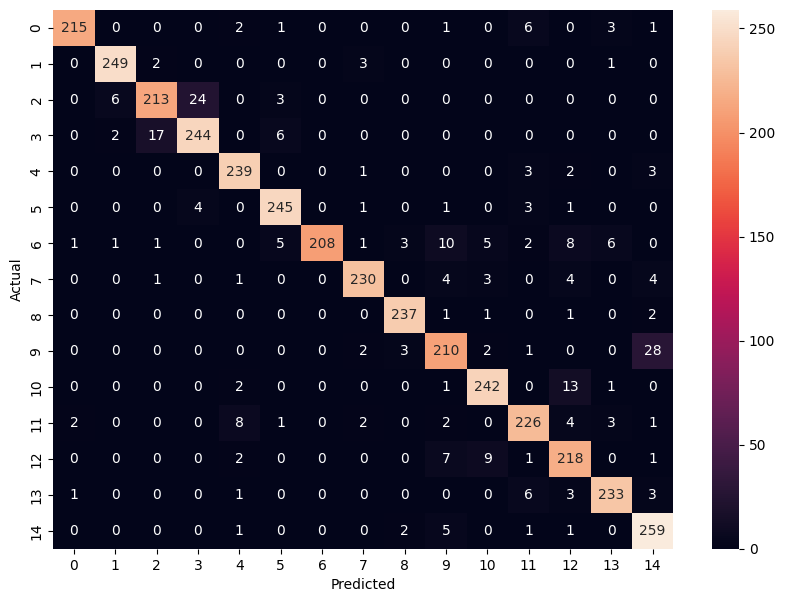

In [16]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')